# Casas 2016

http://www.properati.com.ar/data/

Archivo CSV properati-AR-2017-08-01-properties-sell.csv

In [8]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

df = pd.read_csv('/home/matias/Escritorio/notebook/properati-AR-2017-08-01-properties-sell.csv')
df.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,93.0,360.360360,1290.322581,NaN,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,220.0,1000.000000,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...
2,e06d6f864a0b91346594da4d27ceddcef0947ea6,2012-11-01,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0199509,-57.5265733",...,42.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/336o_venta_departa...,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,DTO. 2 AMB. C/ VISTA PLENA AL MAR,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...
3,a07927207d2a03de5f4ba7fd76f670d6285a3315,2012-11-26,sell,house,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,Buenos Aires Interior,3427958.0,"-37.9511934894,-57.7752885836",...,265.0,NaN,NaN,NaN,6.0,NaN,http://www.properati.com.ar/47hc_venta_terreno...,PROPIEDAD DE CATEGORIA CUENTA CON: 4 DORMITOR...,CHALET EN VENTA,https://thumbs4.properati.com/9/DA4GMdxXrthh5z...
4,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,103.0,616.666667,1796.116505,NaN,5.0,NaN,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...


In [32]:
#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

#Filtramos solo las Casas
casasCF = propCF[propCF['property_type']== 'house']

#En el año 2016
casasCF2016 = casasCF[casasCF.created_on.str.contains('2016')]

#Tomo los datos que me interesan de la tabla, en este caso solo me interesa el precio de las propiedades
casasCF2016S= casasCF2016[['place_name','place_with_parent_names','surface_total_in_m2', 'price_usd_per_m2']]

#Saco los Nan de la tabla resultante
casasCF2016S.dropna(inplace=True)

#Agrego el precio de la propiedad como columna como el producto de la superficie y el precio por m2
casasCF2016S['price_property'] = casasCF2016S['surface_total_in_m2']*casasCF2016S['price_usd_per_m2']

#Agrupo por Barrio
porBarrio = casasCF2016S.groupby('place_name').agg([np.mean, np.size])

#Elimino Capital Federal ya que es el resultado de los datos donde on estaba especificado el barrio
porBarrio2 = porBarrio.drop(['Capital Federal'])

#Filtramos barrios con poca representacion de datos > de 10 publicaciones
porBarrio3 = porBarrio2.loc[porBarrio2[('price_property','size')]>2,:]
                             
#Obtengo el Top de los barrios
topBarrios = porBarrio3.sort_values([('price_property','mean')], ascending =False)
topBarrios.head(57)



/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


surface_total_in_m2       price_usd_per_m2        \
                                   mean  size             mean  size   
place_name                                                             
Palermo Chico                620.571429   7.0      5681.895034   7.0   
Recoleta                     623.000000   3.0      6293.178324   3.0   
Belgrano                     503.074074  27.0      2710.835757  27.0   
Balvanera                    797.444444   9.0      1047.305114   9.0   
Palermo Hollywood            138.250000   4.0      5291.623845   4.0   
Colegiales                   484.666667   3.0      1472.005761   3.0   
Villa Devoto                 291.565217  23.0      1977.952608  23.0   
Palermo                      281.333333   9.0      2117.476464   9.0   
Caballito                    373.083333  12.0      1396.445007  12.0   
San Telmo                    561.000000   6.0      1052.013811   6.0   
Boedo                        419.166667  12.0      1080.611922  12.0   
San Cristobal                416.076923  13.0      1129.307900  13.0   
Barracas                     308.937500  16.0      1138.330402  16.0   
Parque Centenario            345.000000   4.0      1217.391304   4.0   
Almagro                      381.363636  11.0      1182.210508  11.0   
Parque Patricios             355.769231  13.0      1114.363441  13.0   
Nuñez                        175.000000   6.0      2604.865301   6.0   
Villa Luro                   332.000000   9.0      1151.759906   9.0   
Villa Crespo                 304.090909  11.0      1244.754217  11.0   
Villa Urquiza                273.600000   5.0      1410.295551   5.0   
Villa Santa Rita             300.571429   7.0      1565.452876   7.0   
Monte Castro                 244.777778   9.0      1685.840108   9.0   
Flores                       328.400000  20.0      1116.923511  20.0   
Saavedra                     225.333333   6.0      1811.053509   6.0   
Villa del Parque             254.875000   8.0      1611.078967   8.0   
Parque Chacabuco             278.833333   6.0      1278.015817   6.0   
Paternal                     331.500000  12.0      1174.720791  12.0   
Villa General Mitre          370.166667   6.0       942.951591   6.0   
Mataderos                    252.200000  25.0      1139.399232  25.0   
Liniers                      229.785714  14.0      1280.155076  14.0   
Villa Pueyrredón             300.000000   8.0      1391.815016   8.0   
Villa Lugano                 282.888889   9.0      1026.746808   9.0   
Boca                         260.600000   5.0      1271.350232   5.0   
Floresta                     287.181818  11.0      1124.377384  11.0   

                    price_property        
                              mean  size  
place_name                                
Palermo Chico         3.442857e+06   7.0  
Recoleta              2.933333e+06   3.0  
Belgrano              1.279074e+06  27.0  
Balvanera             1.069278e+06   9.0  
Palermo Hollywood     7.327500e+05   4.0  
Colegiales            6.866667e+05   3.0  
Villa Devoto          5.281739e+05  23.0  
Palermo               5.270000e+05   9.0  
Caballito             5.045833e+05  12.0  
San Telmo             5.016667e+05   6.0  
Boedo                 4.616250e+05  12.0  
San Cristobal         4.425769e+05  13.0  
Barracas              4.263750e+05  16.0  
Parque Centenario     4.200000e+05   4.0  
Almagro               4.007727e+05  11.0  
Parque Patricios      3.875385e+05  13.0  
Nuñez                 3.721667e+05   6.0  
Villa Luro            3.644444e+05   9.0  
Villa Crespo          3.627273e+05  11.0  
Villa Urquiza         3.594000e+05   5.0  
Villa Santa Rita      3.582857e+05   7.0  
Monte Castro          3.576667e+05   9.0  
Flores                3.409450e+05  20.0  
Saavedra              3.400000e+05   6.0  
Villa del Parque      3.366250e+05   8.0  
Parque Chacabuco      3.315000e+05   6.0  
Paternal              3.102500e+05  12.0  
Villa General Mitre   3.088333e+05   6.0  
Mataderos             

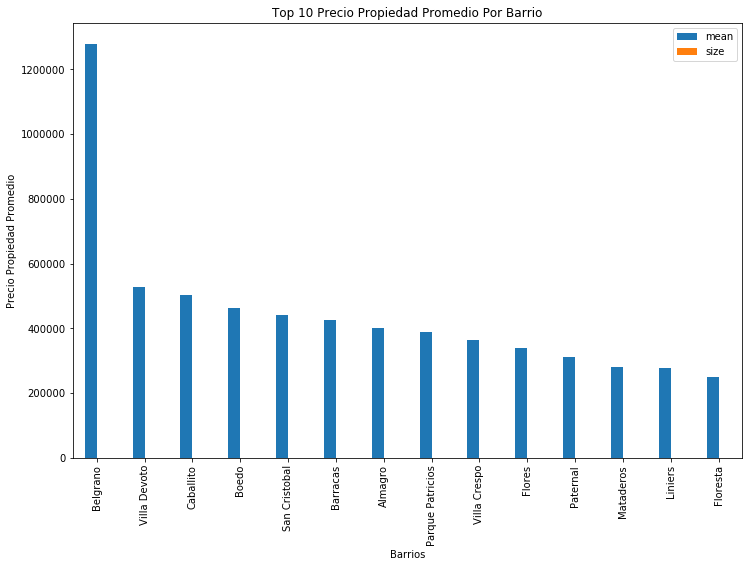

In [30]:
#Parte Grafica del Analisis de Propiedades

%matplotlib inline
topBarrios_hist = topBarrios['price_property']

imagen =topBarrios_hist.plot(kind='bar',rot=90,figsize=(12,8))
imagen.set_xlabel('Barrios')

imagen.set_ylabel('Precio Propiedad Promedio')

imagen.set_title('Top 10 Precio Propiedad Promedio Por Barrio')

imagenEx = imagen.get_figure()
imagenEx.savefig('/home/matias/Escritorio/Datos/GraficoNote2.jpg')
